<a href="https://colab.research.google.com/github/Shahid0120/ml-mini-projects/blob/main/logistic_regression_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Titanic Data set Logistic Regression***

*Shahid Hussain 9th December 2023*

The main aim of this program is to use the titanic data set to perform a
logistic regression to determine wheather

(1)  Simple Logistic regression : does you chance of survival impacted by weight?

(2) General Logistic model : Does survival on titanic effected by class and gender ?



In [2]:
pip install pydataset


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=04e0e42128716269e0a09f70dca66aaabf810b20790b0a6cabbe913cf9e87efc
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Exploring Data**

In [14]:
# importing dataset
titanic = data('titanic')
titanic.describe()


,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


In [16]:
unique_class = titanic['class'].unique()
print(unique_class)

['1st class' '2nd class' '3rd class']


In [18]:
unique_sex = titanic['sex'].unique()
print(unique_sex)

['man' 'women']


In [20]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


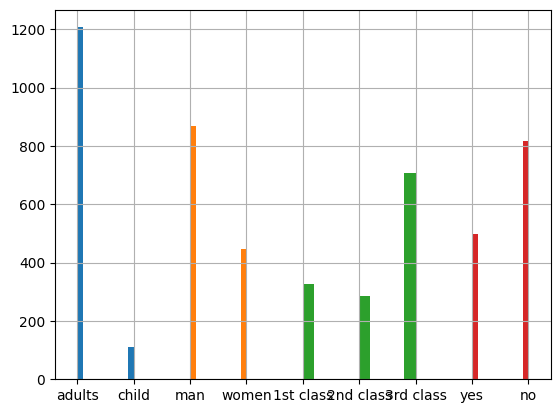

In [37]:
histogram_age = titanic['age'].hist()
histogram_sex = titanic['sex'].hist()
histogram_class = titanic['class'].hist()
histogram_survived = titanic['survived'].hist()

In [43]:
# create a new continuous vairable "weight"
# Setting seed for reproducibility
np.random.seed(42)

# randomly assign number to weight
titanic['weight'] = np.random.normal(loc=70, scale=0, size=len(titanic))

# function to assign wieght normal distribution based on age
def assign_weight(age):
  if age == 'adults':
    return np.random.normal(loc=70, scale=30)
  else:
    # child
    return np.random.normal(loc=40, scale=20)

titanic['weight'] = titanic['age'].apply(assign_weight)

# Display the modified DataFrame
print(titanic.head())


       class     age  sex survived     weight
1  1st class  adults  man      yes  38.046590
2  1st class  adults  man      yes  60.843259
3  1st class  adults  man      yes  51.714634
4  1st class  adults  man      yes  64.390861
5  1st class  adults  man      yes  71.699498


In [46]:
# double check if it is correct distribution
print(titanic[titanic['age'] == 'adults'].mean())
print(titanic[titanic['age'] == 'child'].mean())

weight    70.942455
dtype: float64
weight    39.968197
dtype: float64


<ipython-input-46-c703b09a57c0>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(titanic[titanic['age'] == 'adults'].mean())
<ipython-input-46-c703b09a57c0>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(titanic[titanic['age'] == 'child'].mean())


**Simple Logistic Regression**

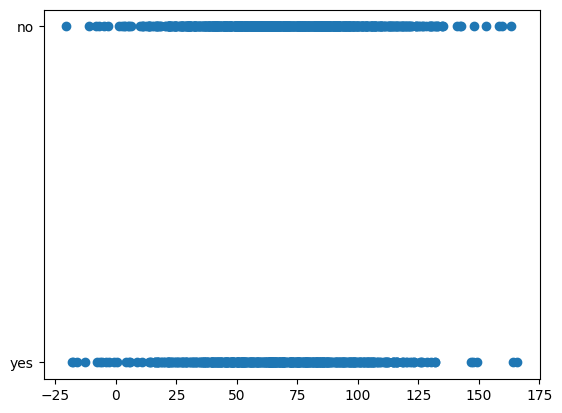

In [48]:
# selecting features and target variable
x = titanic['weight']
y = titanic['survived']

# dotplot
plt.scatter(x,y)

In [59]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# reshape
x_train_reshaped = x_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)


# creating the logistic model
SLM = LogisticRegression(random_state=42)

# training the model
SLM.fit(x_train_reshaped, y_train)

LogisticRegression(random_state=42)

In [65]:
# predict
y_pred = SLM.predict(x_test_reshaped)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6287878787878788
Confusion Matrix:
 [[166   0]
 [ 98   0]]
Classification Report:
               precision    recall  f1-score   support

          no       0.63      1.00      0.77       166
         yes       0.00      0.00      0.00        98

    accuracy                           0.63       264
   macro avg       0.31      0.50      0.39       264
weighted avg       0.40      0.63      0.49       264



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion: the logistic model has a accurage of ~63% which is extremely low given we are trying to predict survival rates. The key problems from the confusion matrix is that Predicted Negative but actually positive. Potentially we can adjust the deicision threshold